## Problem Description

We would like to design a cup that is shaped like a *frustrum of a cone*. The cup is to be of the following dimensions:

$$height=100\text{ mm}$$
$$volume=300\text{ mL}$$

The radii can only have integer milimeters, even if we add up to $10\text{ mL}$ to the volume of the cup. What should the upper and lower radii be? Select the design with the least surface area, as long as the cup is stable ($R/r$ shouldn't be too large) and the cup is comfortable to hold ($r$ shouldn't be too small).

This problem aims to explore the following:

1. Evaluating a function over a region with *itertools.product()*
2. Searching within lists with *list.index()* for values that satisfy certain conditions.
3. Root Finding: *scipy.optimize.root()*
4. Plotting a function of 1 variable
6. Plotting a function of 2 variables

## 1. Evaluating a function over a region with *itertools.product()*

This is typical application when evaluating a function of two variables $f(x,y)$ such as the volume of a tapered cylinder:

$$V(r,R)=\frac{\pi l}{3}(R^2+Rr+r^2)$$

See [the previous post](http://nbviewer.jupyter.org/github/rshd/jupyter/blob/master/cup.ipynb) for volume and surface area calculations (using integrals).

### Input

In [148]:
#Input

l=100 #mm, height
V0=300 #mL, volume
Vt=10 #mL, volume tolerance 
r_range=range(10,100) #mm, range for r, R

# minimum surface area
n=3 # number of points to show of least surface area

### Evaluating the Function

In [149]:
from math import*
import itertools

r=[j for j in r_range] 
R=r
g=itertools.product(r,R) # cartesian product of r and R

data=[]
for k in g:
    r,R=k[0],k[1]
    if R>=r:
        V=pi*l/3*(R**2+r*R+r**2)/1000 #mL
        vdiff=V-V0 #deviation from desired volume
        S=pi*(R+r)*sqrt((R-r)**2+l**2)
        data.append((r,R,V,vdiff,S))
    
print('Total datapoints')
print(len(data))    

Total datapoints
4095


## 2. Searching within Lists

Searching with the *list.index()* method returns the first value that satifies the condition you set. Which is good for things like getting the closest point to the desired volume.

In [150]:
# closest point to desired volume
vdiff=[k[3] for k in data]

condition=min([k for k in vdiff if k>=0])
index=vdiff.index(condition)
r1,R1,V1,vdiff1,S1=data[index]

print('\nThe closest value to {} mL is:'.format(V0))
print('r={} mm  R={} mm  V={:6.2f} mL'.format(r1,R1,V1))


The closest value to 300 mL is:
r=17 mm  R=43 mm  V=300.44 mL


### Caution: The *list.index()* Method

*list.index()* only returns the **first** index that satisfy a value. 

So, what if we want multiple values, such as all values within 10 mL from the desired volume?

In [151]:
indices=[]
for j in vdiff:
    if j<Vt and j>=0: #"condition"
        indices.append(vdiff.index(j)) 
          #get the index that satisfies "condition" in vdiff
        vdiff[vdiff.index(j)]=vdiff[vdiff.index(j)]+1000 
          #altered the value so to search for the next index

for j in indices:
    vdiff[j]=vdiff[j]-1000 #restored altered value to what it was

sol=[]        
for j in indices: #j satisfies "condition"
    k=data[j]
    pt=(j,k[0],k[1],k[2],k[3],k[4]) #get the datapoints at indices
    sol.append(pt)

#check..    
print('Total datapoints satisfying "condition"')
s=set(sol)
if (len(s)==len(sol)):
    print('{} unique points'.format(len(s)))
else:
    print('check your data!')   

Total datapoints satisfying "condition"
21 unique points


### Plot 1

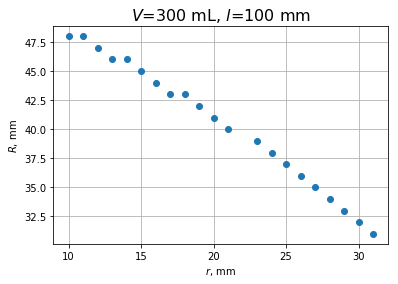

In [152]:
import matplotlib.pyplot as plt

# extract datapoints
x=[k[1] for k in sol]
y=[k[2] for k in sol]

# plot 1
plt.plot(x,y,'o')
plt.grid()
plt.title('$V$={} mL, $l$={} mm'.format(V0,l),fontsize=16)
plt.xlabel('$r$, mm')
plt.ylabel('$R$, mm')
plt.show()

## 3. Root Finding: *scipy.optimize.root()*

What if we want to know the exact solution at $r$?

In [153]:
from scipy.optimize import root

def f(R):
    return pi*l/3*(R**2+R*r+r**2)-V0*1000

y2=[]
for k in sol:
    r=k[1]
    solution=root(f,20) #solves the quadratic eq
    y2.append(solution.x[0])  #takes the positive root

### Plot 2

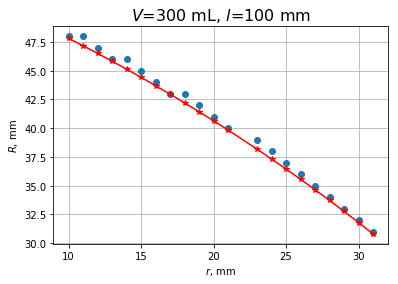

In [154]:
# plot 2
plt.plot(x,y,'o')
plt.plot(x,y2,'-*r')
plt.grid()
plt.title('$V$={} mL, $l$={} mm'.format(V0,l),fontsize=16)
plt.xlabel('$r$, mm')
plt.ylabel('$R$, mm')
plt.show()

## Minimum Surface Area

The surface area is given by
$$S=\pi(R+r)\sqrt{(R-r)^2+l^2}$$

In [155]:
S=[k[5] for k in sol]

j=S.index(min(S))
solution=sol[j]

## Conclusion
Best value

In [156]:
print('The point with least surface area is')
print('r= {} mm'.format(solution[1]))
print('R= {} mm'.format(solution[2]))
print('V= {:6.2f} mm'.format(solution[3]))
print('S= {:6.2f} mm'.format(solution[5]))
print('l= {} mm'.format(l))

The point with least surface area is
r= 17 mm
R= 43 mm
V= 300.44 mm
S= 19476.25 mm
l= 100 mm


### Other options
Print the best $n$ number of values..

In [157]:
print('{} points of least minimum surface area:'.format(n))

if len(S)>n:
    for j in range(n):
        m=min(S)
        for k in sol:
            if k[5]==m:
                print(k)
        S.pop(S.index(min(S)))
else:
        [print(j) for j in S]

3 points of least minimum surface area:
(635, 17, 43, 300.44097743830395, 0.4409774383039462, 19476.25291758422)
(1680, 31, 31, 301.9070540099791, 1.907054009979106, 19477.874452256718)
(1612, 30, 32, 302.01177376509884, 2.0117737650988374, 19481.76963766757)


# Plotting Volume to Surface Ratio

Let's plot the function $V/S$ later..
$$\frac{V}{S}\text{ at }l=f(r,R)=\frac{\frac{\pi l}{3}(R^2+Rr+r^2)}{\pi(R+r)\sqrt{(R-r)^2+l^2}}$$


Text(0,0.5,'R, mm')

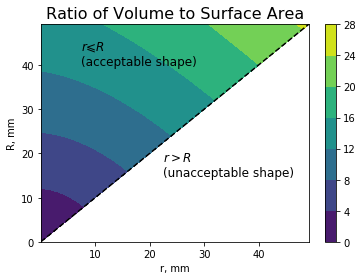

In [166]:
import numpy as np

def z(X,Y):
    return l/3*(Y**2+Y*X+X**2)/((Y+X)*np.sqrt((Y-X)**2+l**2))
q=50
x=np.arange(0.1,q) #r
y=x                  #R
X,Y=np.meshgrid(x,y)
Z=np.zeros(np.shape(X))

g=itertools.product(range(0,len(x)),range(0,len(y)))
for i in g:
    if X[i]<=Y[i]:
        Z[i]=z(X[i],Y[i])
    else:
        Z[i]=nan

plt.contourf(X,Y,Z)
plt.colorbar()
plt.text(.45*q,.3*q,'$r>R$\n(unacceptable shape)',size=12)
plt.text(.15*q,.8*q,'$r\leqslant R$\n(acceptable shape)',size=12)
plt.plot(x,y,'--k')
plt.title('Ratio of Volume to Surface Area',size=16)
plt.xlabel('r, mm')
plt.ylabel('R, mm')
plt.show()

$\therefore$ Wider cups have a higher ratio of volume to surface area *for this height*.